In [1]:
library(extrafont)
library(tidyverse)
library(ggnetwork)
library(ggpubr)
library(gridExtra)
library(cowplot)
library(reshape2)
library(sna)

Registering fonts with R
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggpubr’:

    get_legend

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loadi

In [2]:
##### INFILES
##### sequence similarity node file with blast and pfamr results
nodefile <- "GitHubData/Figure2_rave_rbc1.csv"
dat <- read.csv(nodefile)
##### node data frame for modularity cluster mc476
mc476<- dat[dat$Modularity.Class==476,]
##### edgefile for cluster mc476
edgefile <- "GitHubData/SSN_mc476_edgelist.csv"
edges<-read.csv(edgefile,sep='',header=F)

head(edges,3)
head(dat,3)
dim(edges)

V1,V2,V3
<fct>,<fct>,<dbl>
Caenorhabditis_brenneri2902,Caenorhabditis_brenneri8191,224
Caenorhabditis_brenneri2902,Caenorhabditis_brenneri9909,187
Caenorhabditis_brenneri2902,Caenorhabditis_brenneri5885,278


ID,subjectid,identity,alignmentlength,mismatches,gapopen,qstart,qend,sstart,send,⋯,label,r,y,x,Class,RepeatID,V1,Rav,Match,outgroup
<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Caenorhabditis_brenneri11578,Celegans_12676,58.252,206,61,7,2240,1638,747,932,⋯,2799,34,1128.649,-1028.564,DNA,Cbre87479,Tc1#Cbre11578,RAVE,Yes,not out
Caenorhabditis_brenneri11579,Celegans_12676,71.230,431,83,6,4009,2735,458,853,⋯,4556,34,1161.694,-1047.391,DNA,Cbre87479,Tc1#Cbre11579,RAVE,Yes,not out
Caenorhabditis_brenneri11580,Celegans_12676,94.545,55,3,0,167,3,1144,1198,⋯,173,34,1143.866,-1131.057,DNA,Cbre87479,Tc1#Cbre11580,no,Yes,not out


[1] 378   3

## Figure 2a

In [3]:
a<-ggdraw() +
  draw_image("/Users/lschneider/Desktop/OneDrive - Imperial College London/LSRbackup/SequenceAlignmentNetwork/TcMar/TcMarNEU/Data/PipeSeqAl/SeqAlResults/2018_10_12_14_28/new_color_graphml/TcMar20181012_bit_oo_stat_zusatz_uniqfamColoured_Colvir.png")
df <- data.frame(a=c('a','b','c','d','e','f'),b=c(5,8,3,4,6,7))
makelegend <- ggplot(df, aes(a,b))+geom_col(aes(fill=a))+
                scale_fill_manual(values=c('#8491B4','#4DBBD5','#00A087','#3C5488','#F39B7F','#E64B35'),
                                  labels=c(1,2,3,4,5,8))+
                theme(legend.position='bottom',legend.spacing.x = unit(0.5, 'cm'),
                      legend.background=element_rect(fill=NULL,size=0),
                      legend.margin=margin(t=0,r=0,l=2,b=1.5,unit='cm'),
                      text=element_text(size=15,family="Times New Roman"))+
                guides(fill=guide_legend(nrow=1,title="Subfamilies/Cluster"))

a_legend <- get_legend(makelegend)

## Figure 2b & 2c

Modularity.Class,NFams,NSeqs,Size
<int>,<int>,<int>,<chr>
0,2,3,3-5
1,1,3,3-5
2,1,2,2
3,1,3,3-5
4,1,2,2
5,1,2,2


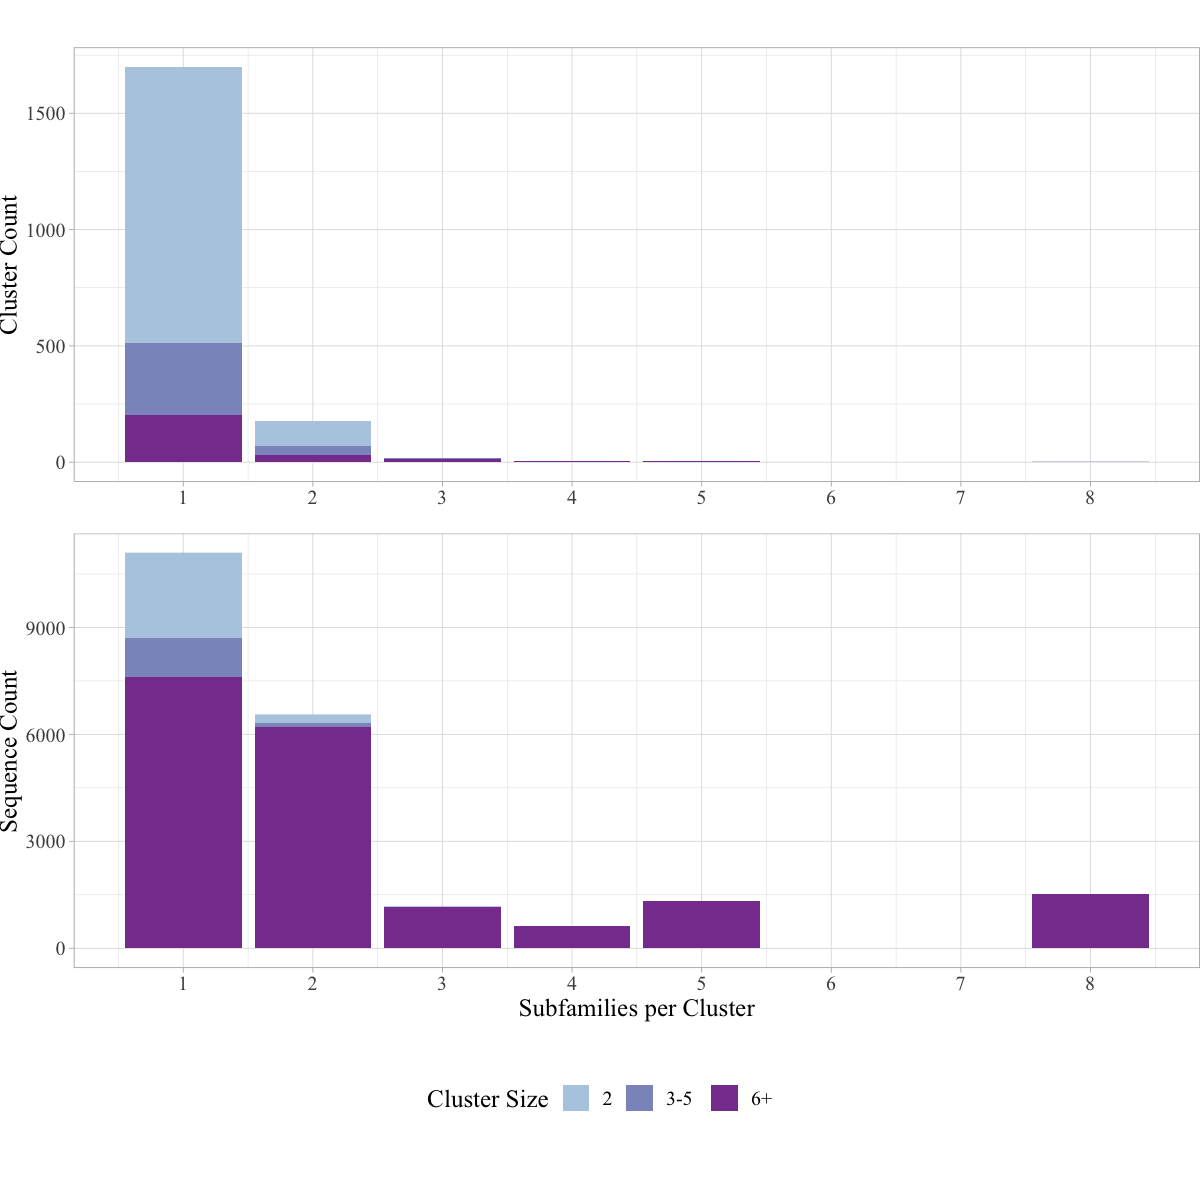

In [4]:

fam_counts <- dat %>% group_by(Modularity.Class) %>%count(Family) %>% count(name="NFams") #%>% count()
seq_counts <- dat %>% group_by(Modularity.Class)%>% count(Family) %>% tally(n,name="NSeqs")
seq_fam_clust_count <- merge(fam_counts,seq_counts,by="Modularity.Class")
seq_fam_clust_count$Size <- ifelse(seq_fam_clust_count$NSeqs<=2,'2',ifelse(seq_fam_clust_count$NSeqs<=5,'3-5','6+'))

head(seq_fam_clust_count)

options(repr.plot.width = 10, repr.plot.height = 10)

b <- ggplot(seq_fam_clust_count,aes(NFams,NSeqs))+
        geom_col(aes(group=Size,fill=Size))+
        theme_light()+
        scale_fill_manual(values=c('#b3cde3','#8c96c6','#88419d'))+
        labs(y="Sequence Count",x="Subfamilies per Cluster",fill="Cluster Size")+
        theme(legend.position="bottom",text=element_text(size=15,family="Times New Roman"),
              plot.margin = unit(c(t=0,r=0,b=1,l=0), "cm"),legend.margin=margin(t=0,b=1.5,r=0,l=0,unit='cm'))+
        scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8),labels=c('0','1','2','3','4','5','6','7','8'))


c <-ggplot(seq_fam_clust_count,aes(x=NFams))+
        geom_bar(aes(group=Size,fill=Size))+
        theme_light()+
        theme(legend.position="bottom",text=element_text(size=15,family="Times New Roman"),
              plot.margin = unit(c(t=1,r=0,b=0,l=0), "cm"),legend.margin=margin(t=0,b=1.5,r=0,l=0,unit='cm'))+
        labs(y="Cluster Count",fill="Cluster Size",x="   ")+
        scale_fill_manual(values=c('#b3cde3','#8c96c6','#88419d'))+
        scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8),labels=c('0','1','2','3','4','5','6','7','8'))


legend2 <- cowplot::get_legend(b)

barplots<-(arrangeGrob(c+
                       theme(legend.position="None"),b+
                       theme(legend.position="None"),legend2,nrow=3,heights=c(4/9,4/9,1/9)))



as_ggplot(barplots)



## Figure 2d

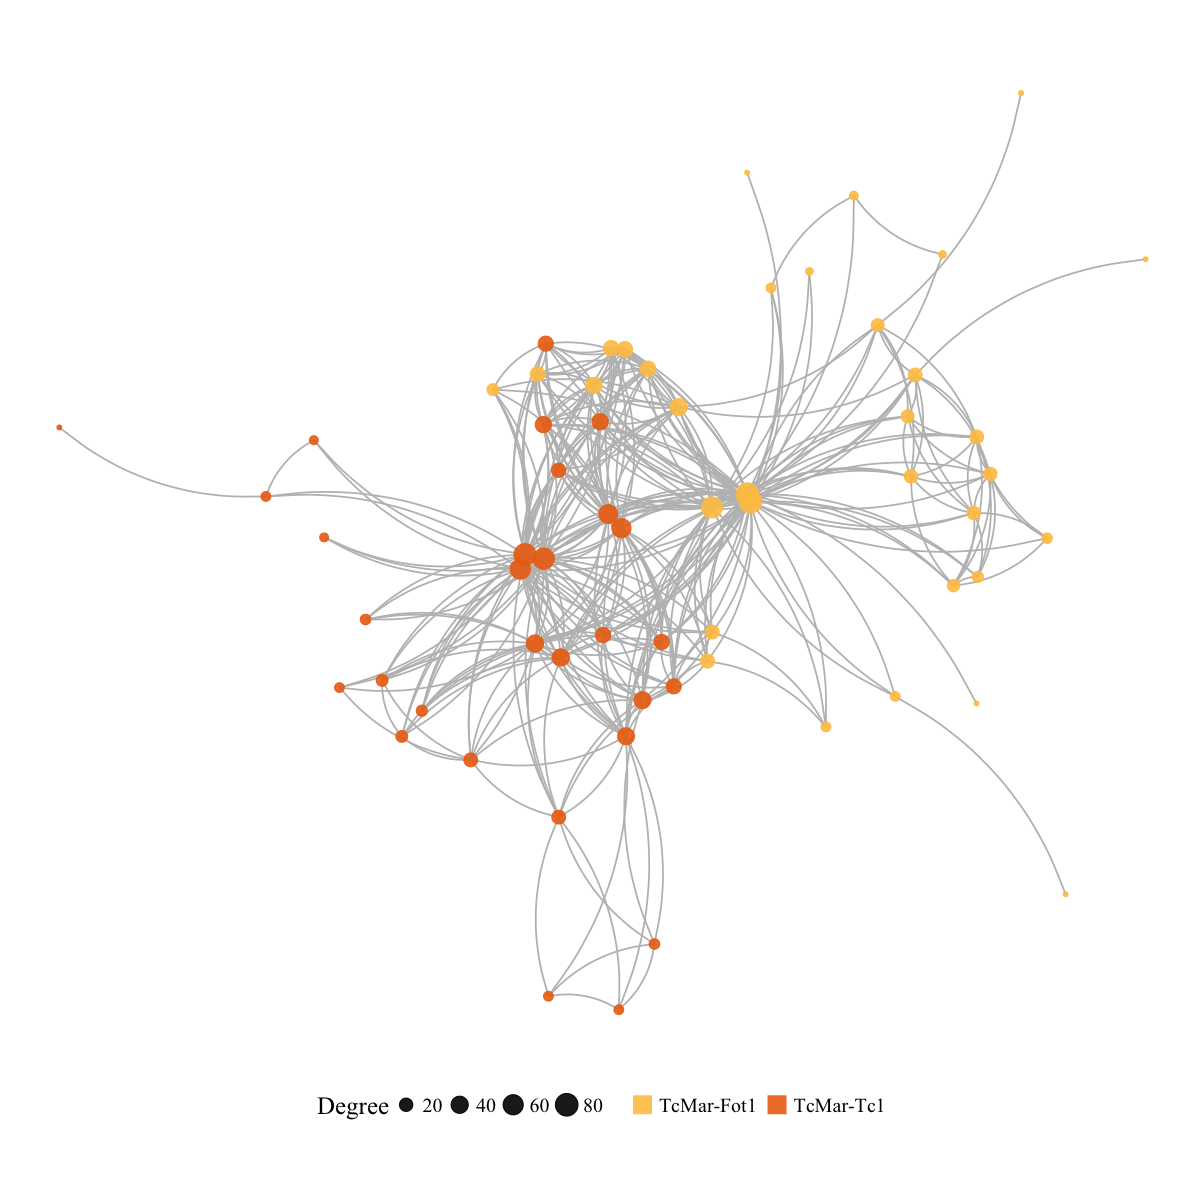

In [5]:

n <- network(edges[,1:2], directed = FALSE,layout = "kamadakawai", weights = edges[,3])
## order the nodes df in the same way as the ggnetwork(n) df:
nodes_sorted <- dat[match(unique(ggnetwork(n)$vertex.names), dat$ID),]


n %v% 'Family' <- as.character(nodes_sorted$Family)
n %v% 'RepeatID' <- as.character(nodes_sorted$V1)
n %v% "RBC1" <- as.character(nodes_sorted$Match)
n %v% 'Degree' <- degree(n)

set.edge.attribute(n,attrname='weight',value=edges$V3)




set.seed(1071967)

d <- ggplot(n, aes(x, y, xend = xend, yend = yend))+
        geom_edges(aes(), curvature = 0.2,color='grey',size=0.5)+
        geom_nodes(aes(color=Family,size=Degree),alpha=0.9)+
        theme_blank()+
        theme(legend.position='bottom',legend.box = "horizontal",
              text=element_text(size=15,family="Times New Roman"),legend.spacing.x = unit(0.5, 'mm'),
              plot.margin = unit(c(t=1,r=0,b=1.5,l=0), "cm"))+
        labs(fill='',color='')+
        guides(color = guide_legend(title = "",override.aes = list(shape = 15, size = 5)),
               size=guide_legend(title='Degree'))+
        scale_color_manual(values=c('#fec44f','#ec7014'))


d




## Figure 2e

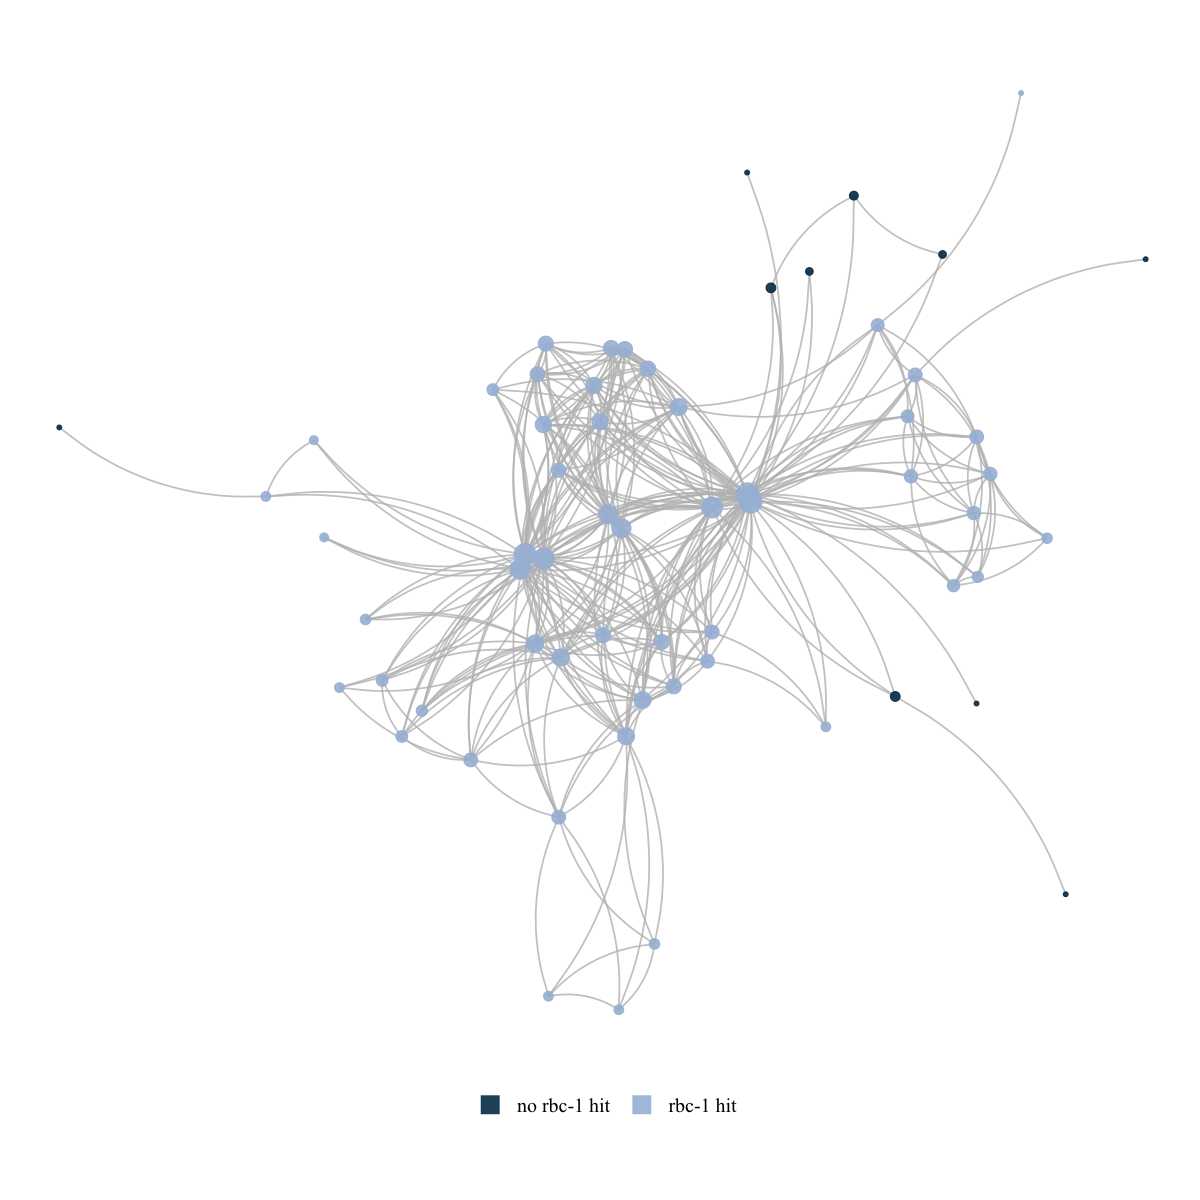

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)

set.seed(1071967)
e <- ggplot(n, aes(x, y, xend = xend, yend = yend)) +
        geom_edges(aes(), color='grey', curvature = 0.2,size=0.5,alpha=0.8)+
        theme_blank()+
        geom_nodes(aes(size=Degree,color=RBC1),alpha=0.9)+
        theme(legend.position='bottom',text=element_text(size=15,family="Times New Roman"),
              plot.margin = unit(c(t=1,r=0,b=1.5,l=0), "cm"))+
        guides(size='none')+
        labs(color='')+
        scale_color_manual(values=c('#023858','#a6bddb'),
                           labels=c('no rbc-1 hit','rbc-1 hit'),
                           guide = guide_legend(override.aes = list(shape = 15, size = 5)))
e

## Figure 2f

[1] 67 42

ID,subjectid,identity,alignmentlength,mismatches,gapopen,qstart,qend,sstart,send,⋯,label,r,y,x,Class,RepeatID,V1,Rav,Match,outgroup
<fct>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Caenorhabditis_brenneri11578,Celegans_12676,58.252,206,61,7,2240,1638,747,932,⋯,2799,34,1128.649,-1028.564,DNA,Cbre87479,Tc1#Cbre11578,RAVE,Yes,not out
Caenorhabditis_brenneri11579,Celegans_12676,71.230,431,83,6,4009,2735,458,853,⋯,4556,34,1161.694,-1047.391,DNA,Cbre87479,Tc1#Cbre11579,RAVE,Yes,not out
Caenorhabditis_brenneri11580,Celegans_12676,94.545,55,3,0,167,3,1144,1198,⋯,173,34,1143.866,-1131.057,DNA,Cbre87479,Tc1#Cbre11580,no,Yes,not out
Caenorhabditis_brenneri11581,Celegans_12677,88.889,27,3,0,86,6,1116,1142,⋯,284,34,1177.147,-1065.836,DNA,Cbre87479,Tc1#Cbre11581,no,Yes,not out
Caenorhabditis_brenneri12222,Celegans_12677,76.271,59,13,1,361,188,1495,1553,⋯,363,34,1060.404,-1011.389,DNA,Cbre87479,Tc1#Cbre12222,RAVE,Yes,not out
Caenorhabditis_brenneri12223,Celegans_12676,66.809,235,59,3,415,1119,2291,2506,⋯,1154,34,1009.683,-1047.931,DNA,Cbre88972,Fot1#Cbre12223,no,Yes,not out


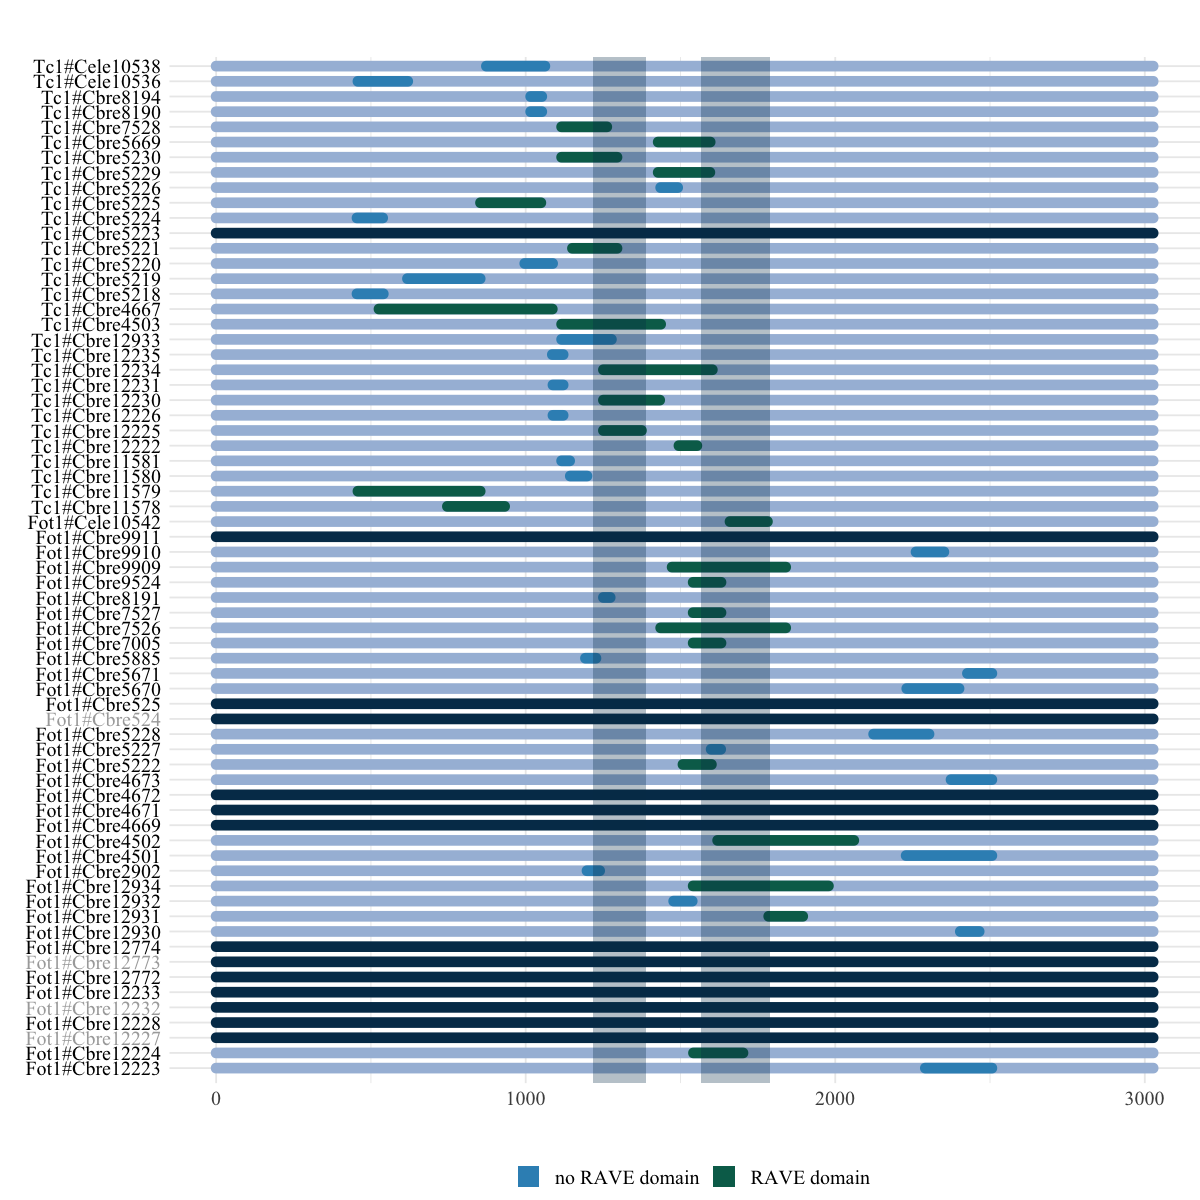

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

mc476andO <- dat[dat$Modularity.Class=='476' | dat$outgroup=='out',]
dim(mc476andO)
head(mc476andO)

redlabs = c("Fot1#Cbre524","Fot1#Cbre12232","Fot1#Cbre12227","Fot1#Cbre12773")
mc476andO$ac <- ifelse(mc476andO$V1 %in% redlabs,'darkgrey', 'black')
axiscolor <- mc476andO$ac[order(mc476andO$V1)]


f<-ggplot(data=mc476andO)+
    geom_rect(data=function(x){x[x$Match=="No",]},
             aes(xmin=0,xmax=3027,ymin=V1,ymax=V1),size=3,color='#023858')+
    geom_rect(data=function(x){x[x$Match=="Yes",]},
            aes(xmin=0,xmax=3027,ymin=V1,ymax=V1),size=3,color='#a6bddb')+
    geom_rect(data=function(x){x[x$Match=="Yes",]},
              aes(xmin=sstart,xmax=send,ymin=V1,ymax=V1,color=Rav,fill=Rav),size=3)+
    annotate("rect", xmin = 1219, xmax =1389, ymin =0, ymax = Inf,alpha = .3,fill='#023858')+
    annotate("rect", xmin = 1566, xmax =1790, ymin =0, ymax = Inf,alpha = .3,fill='#023858')+
    ggtitle("")+
    labs(x='',y='',color='',fill='')+
    scale_color_manual(values=c('#3690c0','#016c59'),labels=c('no RAVE domain','RAVE domain'))+
    scale_fill_manual(values=c('#3690c0','#016c59'),labels=c('no RAVE domain','RAVE domain'))+
    theme_minimal()+guides(color=FALSE)+
    theme(legend.position='bottom',text=element_text(size=15,family="Times New Roman"),
          plot.margin = unit(c(t=0.5,r=0,b=0,l=0), "cm"),axis.text.y = element_text(color=axiscolor))



f


## Figure 2g

Warning message:
“Removed 14 rows containing missing values (geom_rect).”

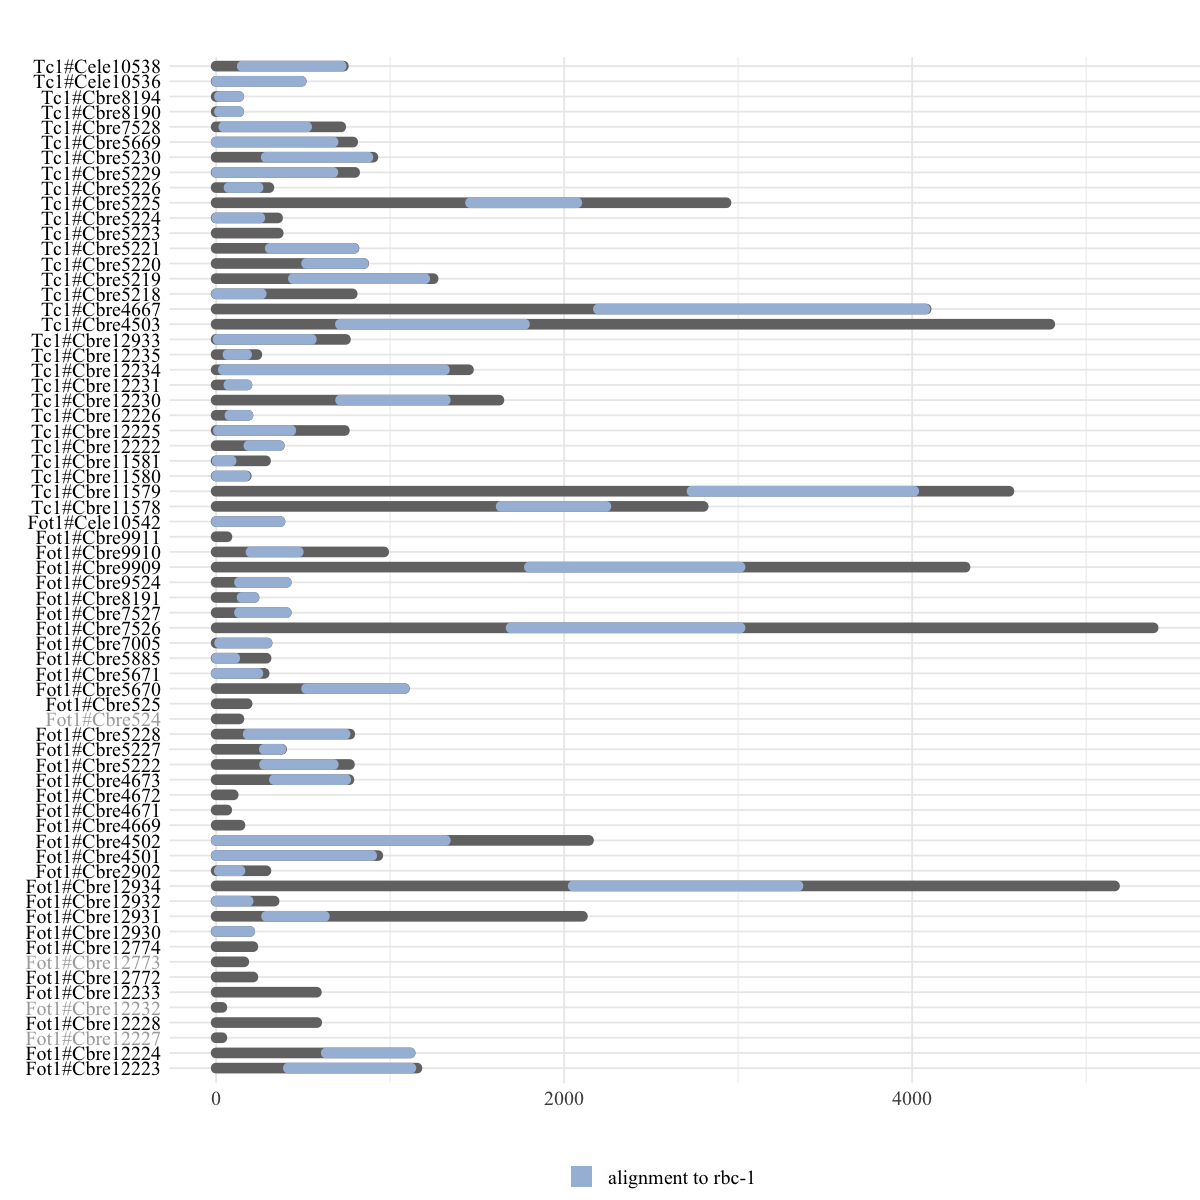

In [12]:
options(repr.plot.width = 10, repr.plot.height = 10)
g <- ggplot(data=mc476andO)+
        geom_rect(aes(xmin=0,xmax=Length,ymin=V1,ymax=V1,fill='TE',color='TE'),size=3)+
        geom_rect(data=function(x){x[x$alignmentlength!=0,]},
                  aes(xmin=qstart,xmax=qend,ymin=V1,ymax=V1,color='alignment',fill='alignment'),size=3)+
        annotate("rect", xmin = 1219, xmax =1389, ymin =0, ymax = Inf,alpha = 0,fill='#737373')+
        ggtitle("")+theme_minimal()+
        labs(x='',y='',fill='')+
        theme(legend.position='bottom',text=element_text(size=15,family="Times New Roman"),
              plot.margin = unit(c(t=0.5,r=0,b=0,l=0), "cm"),axis.text.y = element_text(color=axiscolor))+
        guides(color=FALSE)+
        scale_color_manual(values=c(TE="#737373",alignment="#a6bddb"))+
        scale_fill_manual(values=c("#a6bddb","white"),labels=c("alignment to rbc-1",''))

g

## Figure 2h

Using part as id variables


part,variable,value
<fct>,<fct>,<int>
Network,RBC1_nodes,56
MC476,RBC1_nodes,53
Network,total_nodes,22255
MC476,total_nodes,63


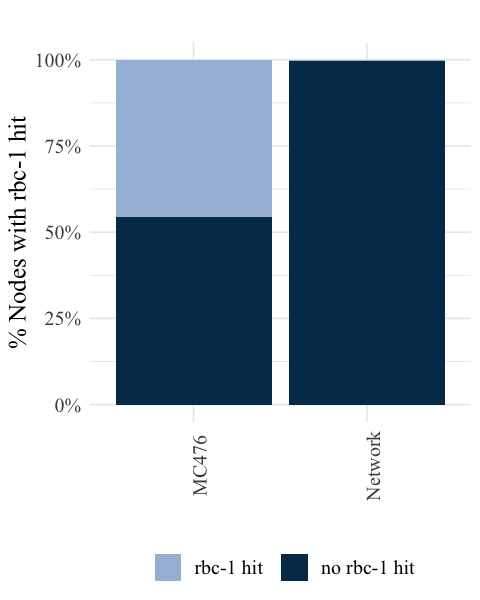

In [14]:
options(repr.plot.width = 4, repr.plot.height = 5)

my_df <- data.frame(part=c('Network',"MC476"),RBC1_nodes=c(dim(dat[dat$Match=='Yes',])[1],dim(mc476[mc476$Match=='Yes',])[1]),total_nodes=c(dim(dat)[1],dim(mc476)[1]))
my_df_melt <- melt(my_df)
head(my_df_melt)
h<- ggplot(my_df_melt,aes(part,value))+
        geom_col(aes(group=variable,fill=variable),position="fill")+
        scale_y_continuous(labels = scales::percent_format())+
        theme_minimal()+ 
        scale_fill_manual(values=c('#a6bddb','#023858'),labels=c('rbc-1 hit','no rbc-1 hit'))+
        labs(y='% Nodes with rbc-1 hit',x='',fill='',title='')+
        theme(legend.position='bottom',text=element_text(size=15,family="Times New Roman"),
              axis.text.x = element_text(angle = 90))

h

## FIGURE CREATION

In [ ]:

row1 <- arrangeGrob(arrangeGrob(a,a_legend,nrow=2,heights=c(8/9,1/9)),barplots,ncol=2,widths=c(2/3,1/3))
row2 <- arrangeGrob(d,e,ncol=2,widths=c(1/2,1/2))
row3 <- arrangeGrob(f,g,h,ncol = 3,widths=c(3/8,3/8,2/8))


options(repr.plot.width = 10, repr.plot.height = 22)


myfigure <- as_ggplot(arrangeGrob(row1,row2,row3,
            nrow=3,heights=c(3/12,3/12,6/12)))+                                
       draw_plot_label(
        label = c("a", "b", "c",'d','e',"f","g","h"), size = 15,
        x = c(0,2/3,2/3,0,0.5,0,0.4,0.8), 
        y = c(1,1,9/10,9/12,9/12,1/2,1/2,1/2),family="Times New Roman")

myfigure
